total: 462
correct: 398
accuracy: 0.8614718614718615
total: 228
correct: 199
accuracy: 0.8728070175438597
total: 690
correct: 597
accuracy: 0.8652173913043478
loss_train: 165.599549861
loss_test: 80.6029576954


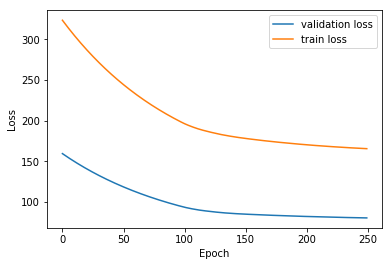

In [125]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
from sklearn import svm

#读取数据，划分训练集和验证集
X_data, y_data = load_svmlight_file("australian_scale.txt")
X_train, X_test, y_train, y_test = train_test_split(X_data.toarray(), y_data, test_size=0.33, random_state=42)

#求Loss时分类的判断条件
def hinge_judge(x, y, w, b):
    return 1 - y * (np.dot(w.T, x) + b) >= 0

#给定矩阵X，一维向量y,w,b,求Loss（根据公式Loss=0.5*w*w+C*sigma(max(0,1-y[i]*(w^T*x[i]+b)))）
def getLoss(X, y, w, b):
    loss = 0 #初始化Loss
    #遍历每组数据
    for i in range(X.shape[0]):
        #如果大于0，累加loss
        if(hinge_judge(X[i], y[i], w, b)):
            loss += 1 - y[i] * (np.dot(w.T, X[i]) + b)
    loss *= C #乘以系数C
    loss += np.dot(w, w) / 2 #加上求和外的0.5*w*w
    return loss

#输出分类的正确率，分类的阈值为0
def printCorrect(X, y, w, b):
    num_correct = 0 
    for i in range(X.shape[0]):
        if y[i] * (np.dot(w.T, X[i]) + b) >= 0: 
            num_correct += 1
    print("total:", len(y))
    print("correct:", num_correct)
    print("accuracy:", num_correct/len(y))

#全零初始化模型参数
w_train = np.zeros(shape=[X_data.shape[1]])
b_train = 0.0

#初始化超参数
max_epoch = 250
lr = 0.01
C = 0.7

#初始化训练数据样本数与特征数
num_example, num_feature = X_train.shape

#画图列表的初始化，epochs存迭代次数，loss_train为训练集Loss，loss_test为验证集Loss
epochs = []
loss_train = []
loss_test = []

#训练开始，迭代max_epoch次
for i in range(max_epoch):
    #添加画图列表的数据，利用getLoss计算相应集合上的Loss
    epochs.append(i)
    loss_train.append(getLoss(X_train, y_train, w_train, b_train))
    loss_test.append(getLoss(X_test, y_test, w_train, b_train))
    
    #初始化该次迭代的参数梯度，全零初始化
    w_gradient = np.zeros(shape=[X_data.shape[1]])
    b_gradient = 0
    
    #遍历每组数据，根据hinge_judge判断该组数据是否对梯度有贡献
    for j in range(num_example):
        if hinge_judge(X_train[j], y_train[j], w_train, b_train):
            w_gradient -= C * y_train[j] * X_train[j]
            b_gradient -= C * y_train[j]
    
    #对每组数据求和后得到的梯度求均值
    w_gradient /= num_example
    b_gradient /= num_example
    
    #w的梯度需要加上w_train
    w_gradient += w_train
    
    #更新参数
    w_train = w_train - lr * w_gradient
    b_train = b_train - lr * b_gradient

#调用printCorrect函数，显示训练集和验证集以及所有数据上的正确率
printCorrect(X_train, y_train, w_train, b_train)
printCorrect(X_test, y_test, w_train, b_train)
printCorrect(X_data.toarray(), y_data, w_train, b_train)

#输出训练后训练集和验证集的Loss，用以调参
print("loss_train:", getLoss(X_train, y_train, w_train, b_train))
print("loss_test:", getLoss(X_test, y_test, w_train, b_train))

#显示训练集和验证集的Loss随迭代次数增加而变化的图形
plt.plot(epochs, loss_test, label='validation loss')
plt.plot(epochs, loss_train, label='train loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
